In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Image Translation

In [2]:
img = cv.imread('Clownfish.jpeg',0)
rows,cols = img.shape

'Here in the output, we can see that we have shifted the image in the frame. To understand the code part first, we need to go through the warpaffine function. It takes a matrix as a parameter in the matrix we give x = 70, which means we are telling the function to shift the image 70 units on the right side and y= 110, which means we are telling the function to shift the image 110 units downwards. In the third argument, where we mentioned the num_cols and num_rows, we told the function to crop the image by two units from both x and y sides.'

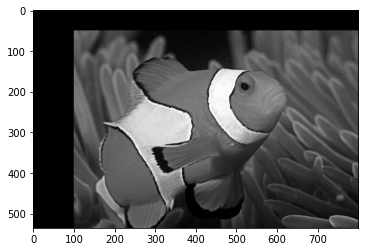

In [3]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst,cmap='gray')
display("Here in the output, we can see that we have shifted the image in the frame. To understand the code part first, we need to go through the warpaffine function. It takes a matrix as a parameter in the matrix we give x = 70, which means we are telling the function to shift the image 70 units on the right side and y= 110, which means we are telling the function to shift the image 110 units downwards. In the third argument, where we mentioned the num_cols and num_rows, we told the function to crop the image by two units from both x and y sides.")

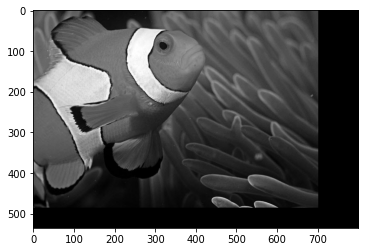

In [4]:
M = np.float32([[1,0,-100],[0,1,-50]])
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst,cmap='gray')

## Affine transformation
An affine transformation preserves lines (hence the alignment of objects), as well as parallelism between lines.  
 It can be decomposed into a similarity transform and a shear transformation.

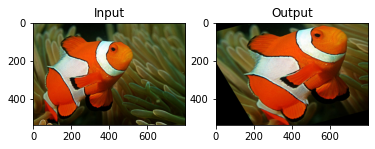

In [9]:
img = cv.imread('Clownfish.jpeg', 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[50, 50],
                   [200, 50], 
                   [50, 200]])
  
pts2 = np.float32([[10, 100],
                   [200, 50], 
                   [100, 250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(1,2,1),plt.imshow(img,),plt.title('Input')
plt.subplot(1,2,2),plt.imshow(dst),plt.title('Output')
plt.show()


## Projective Transformation

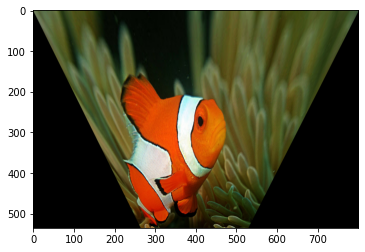

In [10]:
img = cv.imread('Clownfish.jpeg', 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
num_rows, num_cols = img.shape[:2]

src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1], [num_cols-1,num_rows-1]])

dst_points = np.float32([[0,0], [num_cols-1,0], [int(0.33*num_cols),num_rows-1], [int(0.66*num_cols),num_rows-1]])

projective_matrix = cv.getPerspectiveTransform(src_points, dst_points)
img_protran = cv.warpPerspective(img, projective_matrix, (num_cols,num_rows))
plt.imshow(img_protran)

## Similarity Transformation
Similarity Transform (similar transformation) = Rotation (rotation) + Translation (translation) + Scale (zoom)

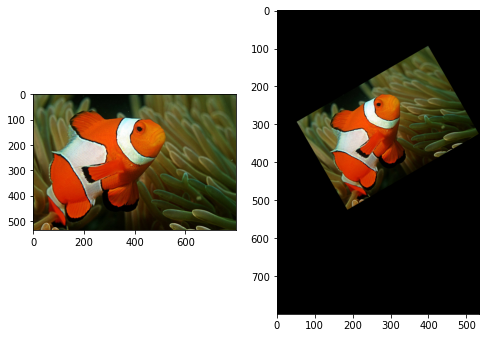

In [ ]:
img = cv.imread('Clownfish.jpeg', 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

M = cv.getRotationMatrix2D(center = (img.shape[0]/2,img.shape[1]/2),
                              angle = 30,
                              scale = 0.5) 


img_rotate = cv.warpAffine(img, M, (img.shape[0], img.shape[1]))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_rotate)
plt.show()